# Оценка качества моделей машинного обучения

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [17]:
wine = pd.read_csv('C:\\MGTU\\6 semestr\\TMO\\winequality-red.csv', sep=",")

In [18]:
# Наименования признаков
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [39]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [21]:
#from sklearn.preprocessing import LabelEncoder

In [22]:
#le = LabelEncoder()
#wine_le = le.fit_transform(wine['quality'])

In [23]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

#le.classes_

In [24]:
#wine_le

In [25]:
#np.unique(wine_le)

In [26]:
#wine.head()

In [27]:
#wine_le.shape

In [28]:
#wine_df = pd.DataFrame(data=wine, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
#wine_le_df = pd.DataFrame(data=wine_le, columns=['quality'])

# Объединяем DataFrame'ы по столбцам
#wine_df = pd.concat([wine_df, wine_le_df], axis=1)

# Печатаем объединенный DataFrame
#print(wine_df)

In [29]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Разделение данных на обучающую и тестовую выборки

In [365]:
X = wine_df.drop(columns=['quality'])  # Признаки
y = wine_df['quality']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(X, y, test_size=0.05, random_state=1)

In [366]:
wine_X_train.shape, wine_y_train.shape

((1439, 11), (1439,))

In [367]:
# Размер тестовой выборки
wine_X_test.shape, wine_y_test.shape

((160, 11), (160,))

In [368]:
np.unique(wine_y_train)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [369]:
np.unique(wine_y_test)

array([0, 1, 2, 3, 4], dtype=int64)

In [370]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [371]:
print_class_proportions(wine_df['quality'])

Метка 	 Количество 	 Процент встречаемости
0 	 10 	 	 0.63%
1 	 53 	 	 3.31%
2 	 681 	 	 42.59%
3 	 638 	 	 39.9%
4 	 199 	 	 12.45%
5 	 18 	 	 1.13%


In [372]:
# Для обучающей выборки
print_class_proportions(wine_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 9 	 	 0.63%
1 	 51 	 	 3.54%
2 	 612 	 	 42.53%
3 	 566 	 	 39.33%
4 	 183 	 	 12.72%
5 	 18 	 	 1.25%


In [373]:
# Для тестовой выборки
print_class_proportions(wine_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 1 	 	 0.62%
1 	 2 	 	 1.25%
2 	 69 	 	 43.12%
3 	 72 	 	 45.0%
4 	 16 	 	 10.0%


# Обучение модели ближайших соседей для произвольно заданного гиперпараметра K.

In [374]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(wine_X_train, wine_y_train)
quality1_1 = cl1_1.predict(wine_X_test)
len(quality1_1), quality1_1

(160,
 array([2, 2, 5, 2, 3, 3, 3, 2, 4, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1,
        2, 3, 2, 3, 2, 1, 4, 3, 2, 3, 3, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 3,
        2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3,
        2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 3, 1, 4, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1, 1, 4, 3, 2, 2,
        3, 2, 3, 3, 2, 4, 2, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 3,
        1, 4, 3, 3, 2, 2], dtype=int64))

In [375]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(wine_X_train, wine_y_train)
quality1_2 = cl1_2.predict(wine_X_test)
len(quality1_2), quality1_2

(160,
 array([2, 2, 4, 2, 3, 3, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
        3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3,
        2, 2, 3, 2, 2, 4, 2, 1, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
        4, 2, 2, 4, 2, 4, 2, 3, 4, 3, 3, 3, 2, 3, 3, 2, 2, 4, 3, 2, 2, 4,
        2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2,
        3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2,
        3, 2, 3, 3, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2,
        3, 4, 3, 3, 3, 3], dtype=int64))

# Метрики качества классификации

### 1) Accuracy


In [376]:
# wine_y_test - эталонное значение классов из исходной (тестовой) выборки
# quality* - предсказанное значение классов

# 2 ближайших соседа
accuracy_score(wine_y_test, quality1_1)

0.53125

In [377]:
# 10 ближайших соседей
accuracy_score(wine_y_test, quality1_2)

0.575

In [378]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [379]:
print_accuracy_score_for_classes(wine_y_test, quality1_1)

Метка 	 Accuracy
0 	 0.0
1 	 0.0
2 	 0.782608695652174
3 	 0.375
4 	 0.25


In [380]:
# 10 ближайших соседей
print_accuracy_score_for_classes(wine_y_test, quality1_2)

Метка 	 Accuracy
0 	 0.0
1 	 0.5
2 	 0.7681159420289855
3 	 0.4722222222222222
4 	 0.25


### balanced_accuracy_score 

In [381]:
# Конвертация целевого признака в бинарный
def convert_quality_to_binary(array:np.ndarray, quality:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==quality else 0 for x in array]
    return res

In [382]:
bin_wine_y_train = convert_quality_to_binary(wine_y_train, 4)
list(zip(wine_y_train, bin_wine_y_train))[:10]

[(5, 0),
 (3, 0),
 (2, 0),
 (2, 0),
 (3, 0),
 (3, 0),
 (1, 0),
 (2, 0),
 (2, 0),
 (3, 0)]

In [383]:
bin_wine_y_test = convert_quality_to_binary(wine_y_test, 4)
list(zip(wine_y_test, bin_wine_y_test))[:10]

[(2, 0),
 (3, 0),
 (3, 0),
 (3, 0),
 (3, 0),
 (3, 0),
 (3, 0),
 (2, 0),
 (2, 0),
 (2, 0)]

In [384]:
bin_quality1_1 = convert_quality_to_binary(quality1_1, 4)
bin_quality1_2 = convert_quality_to_binary(quality1_2, 4)

In [385]:
balanced_accuracy_score(bin_wine_y_test, bin_quality1_1)

0.6145833333333333

In [386]:
balanced_accuracy_score(bin_wine_y_test, bin_quality1_2)

0.6041666666666667

### 2) Матрица ошибок или Confusion Matrix

In [387]:
confusion_matrix(bin_wine_y_test, bin_quality1_1, labels=[0, 1])

array([[141,   3],
       [ 12,   4]], dtype=int64)

In [388]:
tn, fp, fn, tp = confusion_matrix(bin_wine_y_test, bin_quality1_1).ravel()
tn, fp, fn, tp

(141, 3, 12, 4)

In [389]:
confusion_matrix(wine_y_test, quality1_1, labels=[0, 1, 2, 3, 4, 5])

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  5, 54,  9,  1,  0],
       [ 0,  4, 38, 27,  2,  1],
       [ 0,  0,  4,  8,  4,  0],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)

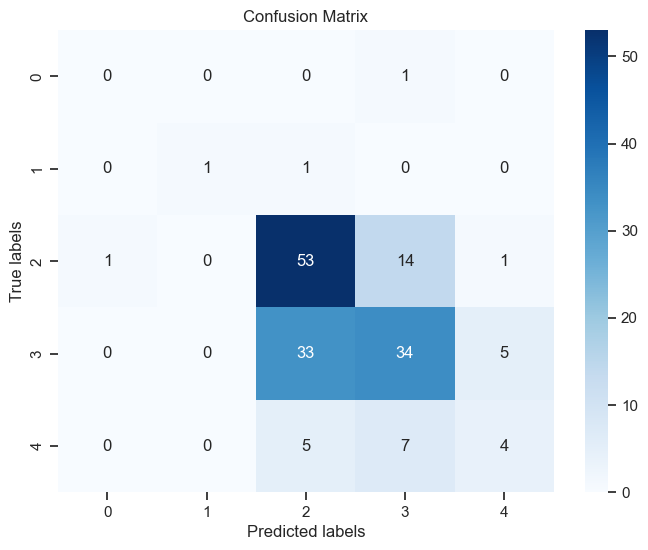

In [390]:
from sklearn.metrics import confusion_matrix


# Получение матрицы ошибок
cm = confusion_matrix(wine_y_test, quality1_2)

# Отображение матрицы ошибок с помощью seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

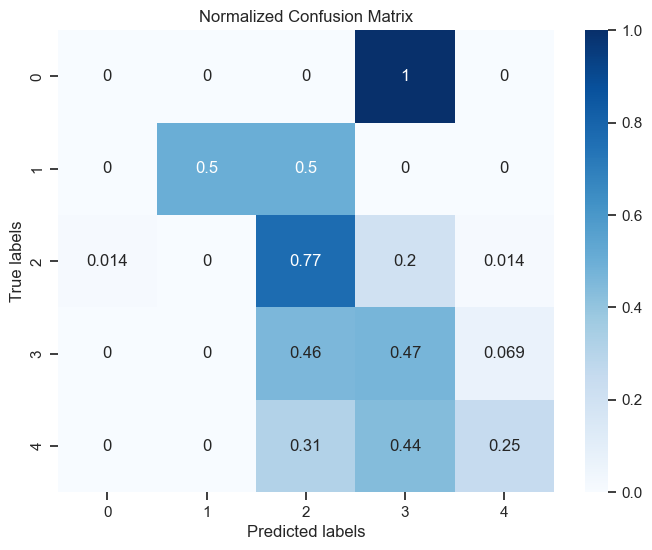

In [391]:
from sklearn.metrics import confusion_matrix


# Получение матрицы ошибок
cm = confusion_matrix(wine_y_test, quality1_2)

# Нормализация матрицы ошибок
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Отображение нормализованной матрицы ошибок с помощью seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.show()

### 3) Precision, recall и F-мера

In [392]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 2 ближайших соседей
precision_score(bin_wine_y_test, bin_quality1_1), recall_score(bin_wine_y_test, bin_quality1_1)

(0.5714285714285714, 0.25)

In [393]:
# Для 10 ближайших соседей
precision_score(bin_wine_y_test, bin_quality1_2), recall_score(bin_wine_y_test, bin_quality1_2)

(0.4, 0.25)

In [439]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(wine_y_test, quality1_1, average='micro')

0.53125

In [395]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(wine_y_test, quality1_1, average='macro')

C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.2870748299319728

In [396]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(wine_y_test, quality1_1, average='weighted')

C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.5647704081632652

#### F-мера

In [440]:
f1_score(bin_wine_y_test, bin_quality1_1)

0.34782608695652173

In [398]:
f1_score(wine_y_test, quality1_1, average='macro')

0.24267852255355507

#### Функция classification_report позволяет выводить значения точности, полноты и F-меры для всех классов выборки.

In [399]:
classification_report(wine_y_test, quality1_1, target_names=wine['quality'].unique(), output_dict=True)

C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMet

{5: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0},
 6: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
 7: {'precision': 0.5510204081632653,
  'recall': 0.782608695652174,
  'f1-score': 0.6467065868263473,
  'support': 69.0},
 4: {'precision': 0.6,
  'recall': 0.375,
  'f1-score': 0.46153846153846156,
  'support': 72.0},
 8: {'precision': 0.5714285714285714,
  'recall': 0.25,
  'f1-score': 0.34782608695652173,
  'support': 16.0},
 3: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0},
 'accuracy': 0.53125,
 'macro avg': {'precision': 0.2870748299319728,
  'recall': 0.2346014492753623,
  'f1-score': 0.24267852255355507,
  'support': 160.0},
 'weighted avg': {'precision': 0.5647704081632652,
  'recall': 0.53125,
  'f1-score': 0.5213671319568222,
  'support': 160.0}}

### 4) ROC-кривая и ROC AUC

In [400]:
# Для 10 ближайших соседей
bin_cl1_2 = KNeighborsClassifier(n_neighbors=10)
bin_cl1_2.fit(wine_X_train, bin_wine_y_train)
proba_quality2_1 = bin_cl1_2.predict_proba(wine_X_test)
true_proba_quality2_1 = proba_quality2_1[:,1]
roc_curve_k10_res = roc_curve(bin_wine_y_test, true_proba_quality2_1, pos_label=1)
roc_curve_k10_res

(array([0.        , 0.        , 0.02083333, 0.08333333, 0.16666667,
        0.29166667, 0.4375    , 1.        ]),
 array([0.    , 0.0625, 0.25  , 0.3125, 0.5   , 0.625 , 0.8125, 1.    ]),
 array([inf, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

In [401]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

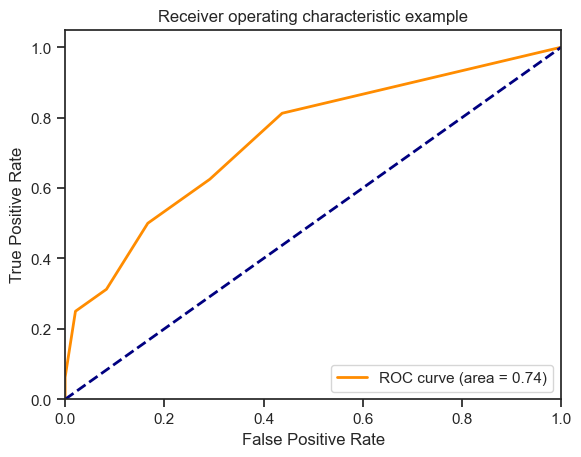

In [402]:
draw_roc_curve(bin_wine_y_test, true_proba_quality2_1, pos_label=1, average='micro')

In [403]:
# Для 10 ближайших соседей
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(wine_X_train, bin_wine_y_train)
proba_lr = lr.predict_proba(wine_X_test)
true_proba_lr = proba_lr[:,1]
roc_curve_lr_res = roc_curve(bin_wine_y_test, true_proba_lr, pos_label=1)
roc_curve_lr_res

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0.        , 0.        , 0.        , 0.00694444, 0.00694444,
        0.04166667, 0.04166667, 0.0625    , 0.0625    , 0.07638889,
        0.07638889, 0.13888889, 0.13888889, 0.18055556, 0.18055556,
        0.34027778, 0.34027778, 0.36805556, 0.36805556, 0.66666667,
        0.66666667, 0.83333333, 0.83333333, 0.88888889, 0.90277778,
        1.        ]),
 array([0.    , 0.0625, 0.1875, 0.1875, 0.3125, 0.3125, 0.375 , 0.375 ,
        0.4375, 0.4375, 0.5   , 0.5   , 0.625 , 0.625 , 0.75  , 0.75  ,
        0.8125, 0.8125, 0.875 , 0.875 , 0.9375, 0.9375, 1.    , 1.    ,
        1.    , 1.    ]),
 array([       inf, 0.61969888, 0.54079902, 0.53814957, 0.50476169,
        0.42313102, 0.38651892, 0.34628091, 0.33644525, 0.32949124,
        0.32655732, 0.27039651, 0.25780161, 0.22317534, 0.21620366,
        0.09755351, 0.09640604, 0.08802896, 0.08574794, 0.02879242,
        0.02834649, 0.01526297, 0.01519859, 0.01204845, 0.01095769,
        0.00184692]))

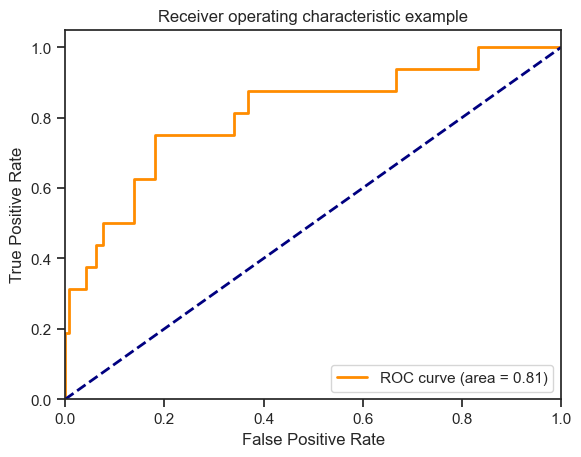

In [404]:
draw_roc_curve(np.array(bin_wine_y_test), np.array(true_proba_lr), pos_label=1, average='micro')

# Подбор гиперпараметров модели и кросс-валидация

In [405]:
accuracy_score(wine_y_test, quality1_2)

0.575

In [442]:
#Оценка качества модели с использованием кросс-валидации
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit


X = wine_df.drop(columns=['quality'])  # Признаки
y = wine_df['quality']  # Целевая переменная

kf = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         X, y, cv=kf)
scores, np.mean(scores)


(array([0.49375   , 0.496875  , 0.525     , 0.49375   , 0.47021944,
        0.4625    , 0.521875  , 0.515625  , 0.475     , 0.52037618,
        0.46875   , 0.50625   , 0.49375   , 0.515625  , 0.5015674 ]),
 0.49739420062695927)

# Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
- Выбранная стратегия кросс-валидации - Repeated K-Fold

In [449]:
# Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(2,42,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

In [450]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=sss, scoring='accuracy')
clf_gs.fit(X, y)

CPU times: total: 2.33 s
Wall time: 3 s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.2,
            train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40])}],
             scoring='accuracy')

In [451]:
clf_gs.best_params_

{'n_neighbors': 28}

plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [452]:
# 5.Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs.best_estimator_.fit(wine_X_train, wine_y_train)
quality2_0 = clf_gs.best_estimator_.predict(wine_X_test)

In [453]:
accuracy_score(wine_y_test, quality2_0)

0.5875

In [454]:
# Качество модели до подбора гиперпараметров
accuracy_score(wine_y_test, quality1_1)

0.53125

# Подбор гиперпараметров на основе случайного поиска и кросс-валидации
- Выбранная стратегия кросс-валидации - StratifiedKFold

In [425]:
skf = StratifiedKFold(n_splits=3)

In [426]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=skf, scoring='accuracy')
clf_rs.fit(X, y)

CPU times: total: 656 ms
Wall time: 895 ms


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40])}],
                   scoring='accuracy')

In [427]:
clf_rs.best_score_, clf_rs.best_params_

(0.48467792370231394, {'n_neighbors': 28})

In [428]:
clf_rs.best_estimator_.fit(wine_X_train, wine_y_train)
quality2_1 = clf_rs.best_estimator_.predict(wine_X_test)

In [429]:
accuracy_score(wine_y_test, quality2_1)

0.5875

# Построение кривых обучения - learning_curve
- Строится зависимость метрики на обучающей выборке от размера выборки.

In [432]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

C:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=20.
  warnings.warn(


<module 'matplotlib.pyplot' from 'C:\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

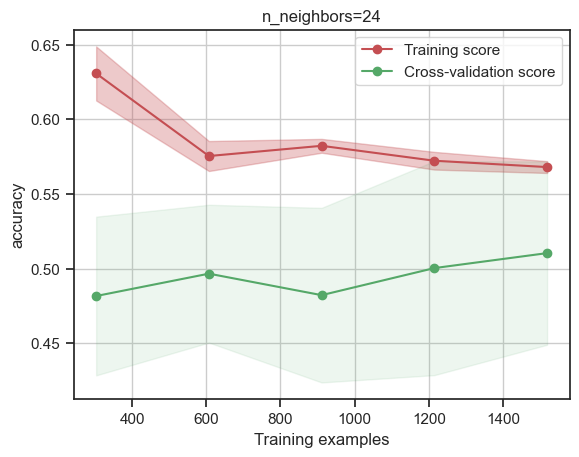

In [433]:
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=24', 
                    X, y, cv=20, train_sizes=np.linspace(.2, 1.0, 5))

# Построение кривой валидации - validation_curve
- Строится зависимость метрики на тестовой выборке от одного из гиперпараметров.

In [434]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

In [435]:
n_range2 = np.array(range(5,125,5))

C:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=20.
  warnings.warn(


<module 'matplotlib.pyplot' from 'C:\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

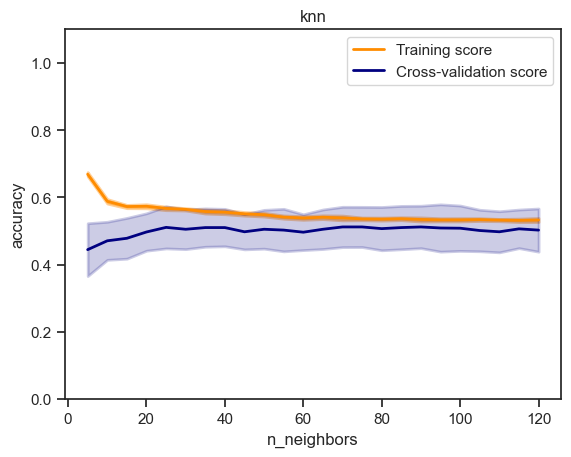

In [436]:
plot_validation_curve(clf_gs.best_estimator_, 'knn', 
                      X, y, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=20, scoring="accuracy")